# Import data and pre-processing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller

In [3]:
df = pd.read_csv("HistoricalQuotes1year.csv") 

In [4]:
df.loc[:, ['date']]= pd.to_datetime(df['date'])
df['date'].min()
df['date'].max()
round(pd.Timedelta(df['date'].max() - df['date'].min()).days/30)
df['datetime'] = pd.to_datetime(df['date'])

df = df.set_index('datetime')

df.drop(['date'], axis=1, inplace=True)

df.head()


,close,volume,open,high,low
datetime,,,,,
2019-01-18,107.71,37299850.0,107.46,107.9000,105.91
2019-01-17,106.12,27151570.0,105.00,106.6250,104.76
2019-01-16,105.38,29655860.0,105.26,106.2550,104.96
2019-01-15,105.01,31537490.0,102.51,105.0500,101.88
2019-01-14,102.05,27194560.0,101.90,102.8716,101.26


In [5]:
data = df.sort_index()
ts_close = data['close']
ts_close.head(14)

datetime
2018-01-18    90.10
2018-01-19    90.00
2018-01-22    91.61
2018-01-23    91.90
2018-01-24    91.82
2018-01-25    92.33
2018-01-26    94.06
2018-01-29    93.92
2018-01-30    92.74
2018-01-31    95.01
2018-02-01    94.26
2018-02-02    91.78
2018-02-05    88.00
2018-02-06    91.33
Name: close, dtype: float64

In [6]:
ts_close = data['close']
ts_close.head(14)

datetime
2018-01-18    90.10
2018-01-19    90.00
2018-01-22    91.61
2018-01-23    91.90
2018-01-24    91.82
2018-01-25    92.33
2018-01-26    94.06
2018-01-29    93.92
2018-01-30    92.74
2018-01-31    95.01
2018-02-01    94.26
2018-02-02    91.78
2018-02-05    88.00
2018-02-06    91.33
Name: close, dtype: float64

In [17]:
print(type(ts_close))

<class 'pandas.core.series.Series'>


# Function test_stationarity

In [7]:
def test_stationarity(timeseries):
    
    plt.figure(figsize=(20,5))
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(14).mean()
    rolstd = timeseries.rolling(14).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.grid()
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


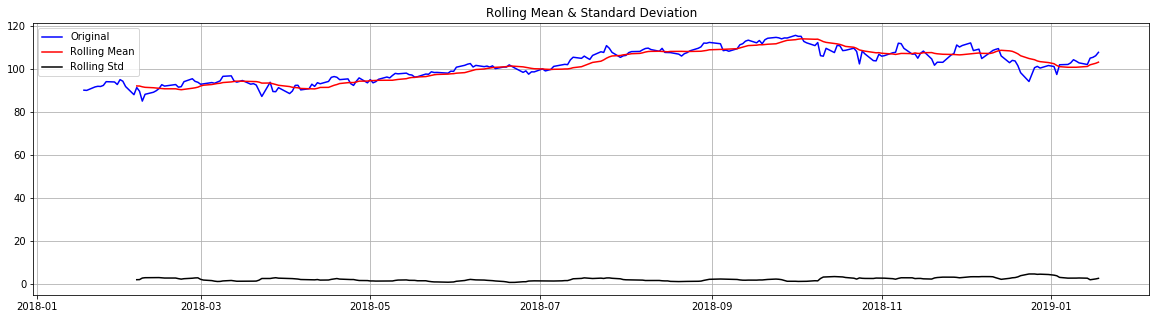

Results of Dickey-Fuller Test:
Test Statistic                  -1.699469
p-value                          0.431386
#Lags Used                       2.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64


In [8]:
test_stationarity(ts_close)

# Анализ данных
Для анализа выдвигаем гипотезы 
Н0 - временной ряд не стационарный
Н1 - временной ряд стационарный, его характеристики не меняются со временем
Выберем уровень значимости 5%
Значение статистики p > 0,05 временной ряд не стационарный

# Step1

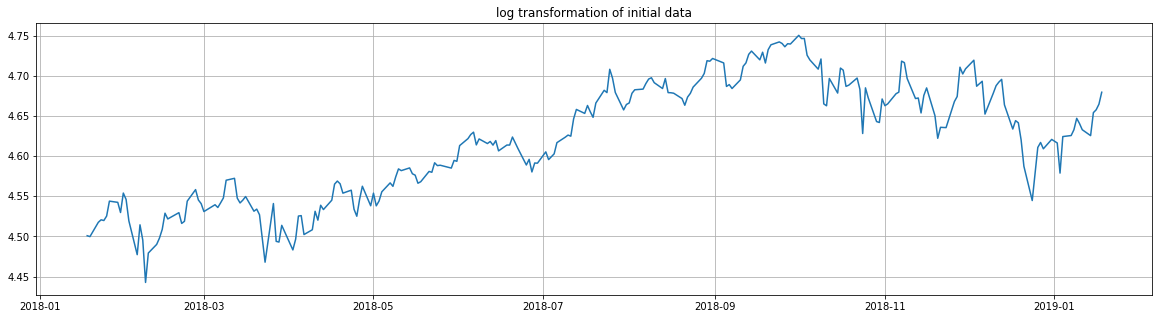

In [9]:
ts_log = np.log(ts_close)

plt.figure(figsize=(20,5))
plt.plot(ts_log)
plt.title('log transformation of initial data')
plt.grid()
plt.show()

# Step2

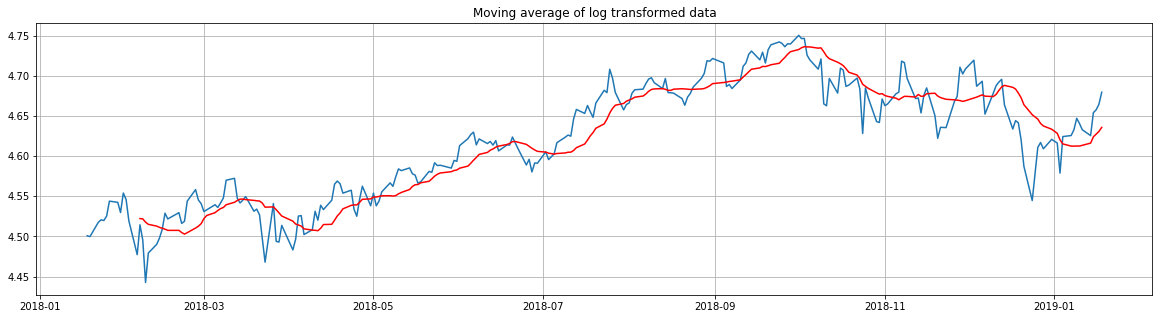

In [10]:
moving_avg = ts_log.rolling(14).mean()

plt.figure(figsize=(20,5))
plt.plot(ts_log)
plt.plot(moving_avg, color='red')
plt.title('Moving average of log transformed data')
plt.grid()
plt.show()

# Step3

In [11]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(14)

datetime
2018-01-18         NaN
2018-01-19         NaN
2018-01-22         NaN
2018-01-23         NaN
2018-01-24         NaN
2018-01-25         NaN
2018-01-26         NaN
2018-01-29         NaN
2018-01-30         NaN
2018-01-31         NaN
2018-02-01         NaN
2018-02-02         NaN
2018-02-05         NaN
2018-02-06   -0.007778
Name: close, dtype: float64

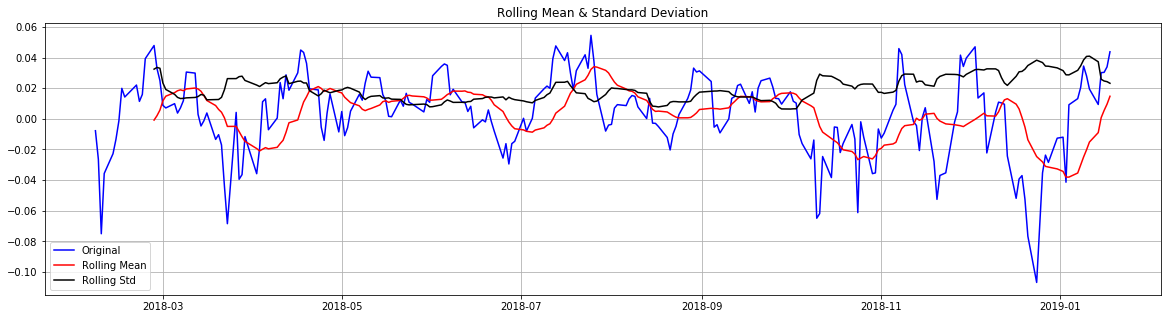

Results of Dickey-Fuller Test:
Test Statistic                  -5.490076
p-value                          0.000002
#Lags Used                       0.000000
Number of Observations Used    239.000000
Critical Value (1%)             -3.458011
Critical Value (5%)             -2.873710
Critical Value (10%)            -2.573256
dtype: float64


In [14]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

# Step4

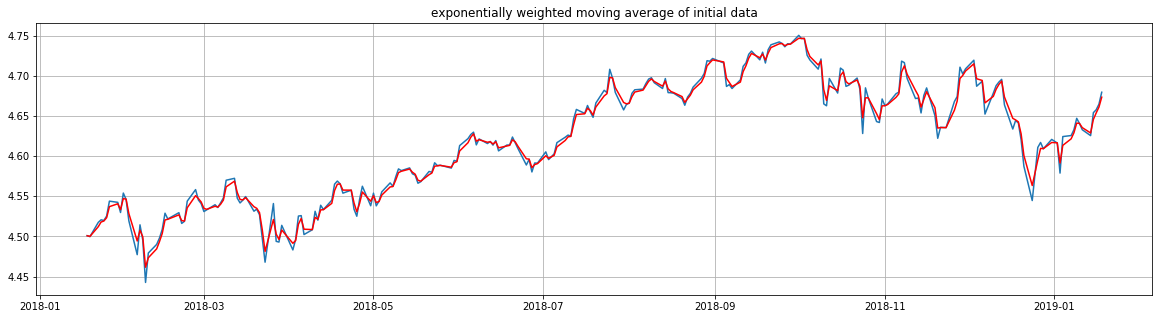

In [15]:
expwighted_avg = ts_log.ewm(com=0.5).mean()

plt.figure(figsize=(20,5))

plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

plt.title('exponentially weighted moving average of initial data')

plt.grid()
plt.show()

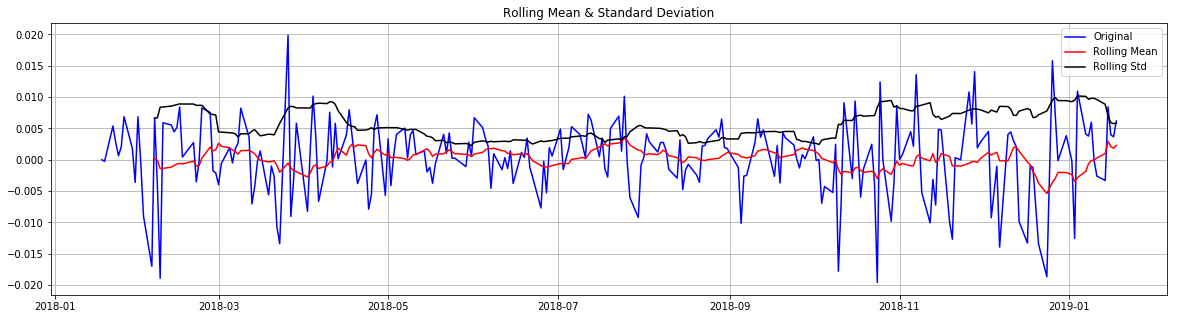

Results of Dickey-Fuller Test:
Test Statistic                -1.413783e+01
p-value                        2.273563e-26
#Lags Used                     0.000000e+00
Number of Observations Used    2.520000e+02
Critical Value (1%)           -3.456569e+00
Critical Value (5%)           -2.873079e+00
Critical Value (10%)          -2.572919e+00
dtype: float64


In [16]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

# Eliminating Trend and Seasonality

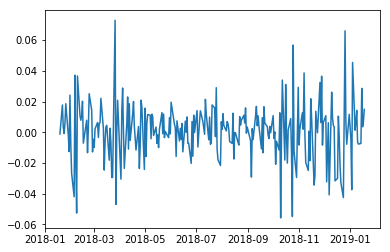

In [17]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

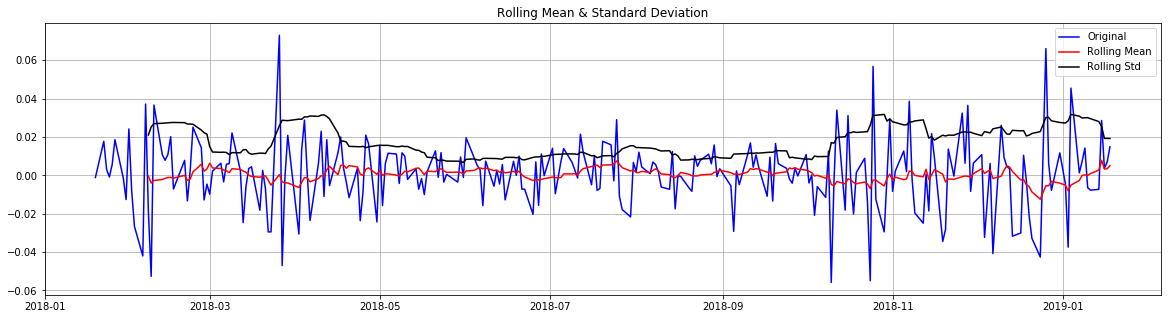

Results of Dickey-Fuller Test:
Test Statistic                -1.435418e+01
p-value                        1.009917e-26
#Lags Used                     1.000000e+00
Number of Observations Used    2.500000e+02
Critical Value (1%)           -3.456781e+00
Critical Value (5%)           -2.873172e+00
Critical Value (10%)          -2.572969e+00
dtype: float64


In [18]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

# Decomposing


In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
ts_log.head()

datetime
2018-01-18    4.500920
2018-01-19    4.499810
2018-01-22    4.517540
2018-01-23    4.520701
2018-01-24    4.519830
Name: close, dtype: float64

In [18]:
print(type(ts_log))

<class 'pandas.core.series.Series'>


In [19]:
# change type to dataFrame

In [13]:
decomposition = seasonal_decompose(ts_log)

ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None

In [ ]:
#ts_log.head
df2 = pd.DataFrame(data=ts_log, index=pd.date_range(start=datetime(2018, 1, 18), periods=length, freq='w'), columns=['value'])

In [39]:
import datetime
length=253
x = np.sin(np.arange(length)) * 10 + np.random.randn(length)
df2 = pd.DataFrame(data=ts_log, index=pd.date_range(start=datetime(2015, 1, 1), periods=length, freq='w'), columns=['value'])

TypeError: 'module' object is not callable

In [48]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


-14.13783

In [ ]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)